In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Linear Regression

## 1. Data

In [2]:
# read data
cars = 

In [3]:
# get columns and preprocess features
X1_cars = 
X2_cars = 
Y_cars = 

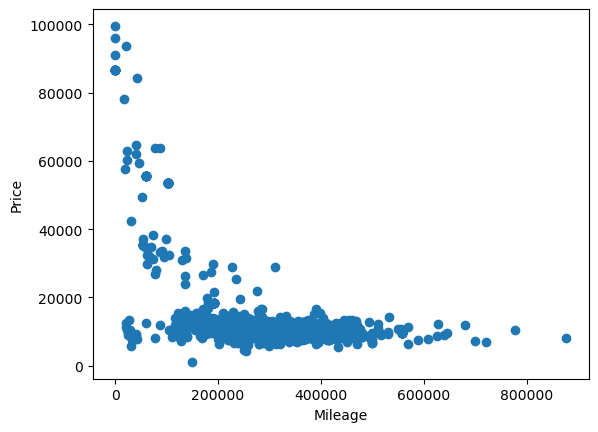

In [4]:
# plot X1 and Y
plt.scatter(, )
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

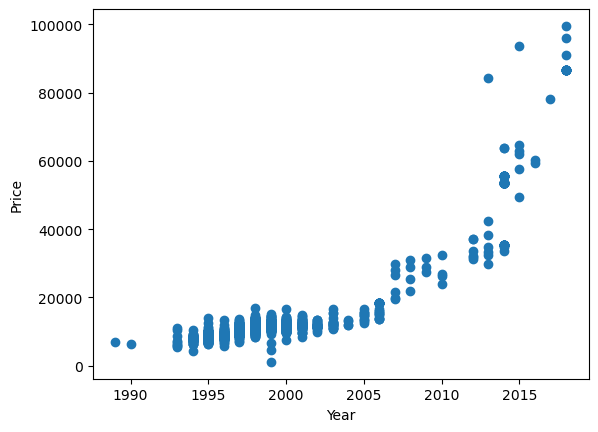

In [5]:
# plot X2 and Y
plt.scatter(, )
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

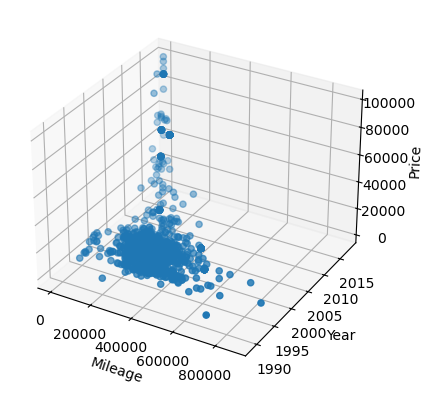

In [6]:
# plot X1, X2 and Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(, , )

ax.set_xlabel("Mileage")
ax.set_ylabel("Year")
ax.set_zlabel("Price")

plt.show()

In [7]:
# create copies of original for later use
X1_cars_copy = 
X2_cars_copy = 
Y_cars_copy = 

# normalize data using z-score
X1_cars = 
X2_cars = 
Y_cars = 

## 2. Linear regression from scratch

In [8]:
# implement linear hypothesis function
def h_linear(X, T):
    return 

In [9]:
# implement cost function
def J_linear(h, Y):
    return 

In [10]:
# create data matrix with three features (add bias feature)
X0_cars = 
X_cars = 

In [11]:
# initialize parameters vector to zeros
T_cars = 

In [12]:
# set learning rate and number of iterations
alpha_cars = 0.001
iterations_cars = 10000

In [13]:
# implement gradient descent
def gradient_descent(X, Y, T, h_function, J_function, alpha, iterations):
    # store costs for plotting
    cost_history = [0] * iterations
    m = len(Y)

    # update parameters
    for iteration in range(iterations):
        h = 

        # print useful information
        if iteration % 1000 == 0: 
            print("Iteration #%d" % iteration)         
            print(J_function(, ))

        # calculate gradient
        gradient = 
        
        # update parameters
        T -= 

        # calculate new cost and store
        cost = J_function(, )
        cost_history[iteration] = cost

    return T, cost_history

In [14]:
# get optimized parameter values and cost history
optimal_T_cars, cost_history_cars = gradient_descent(,
                                                     ,
                                                     ,
                                                     ,
                                                     ,
                                                     ,
                                                     )

Iteration #0
0.49962349397590294
Iteration #1000
0.14536267254784274
Iteration #2000
0.11725139985160618
Iteration #3000
0.11061262798913968
Iteration #4000
0.10802698912214947
Iteration #5000
0.10694097937378129
Iteration #6000
0.10648112300838089
Iteration #7000
0.10628624090128104
Iteration #8000
0.10620364497984419
Iteration #9000
0.10616863845502354


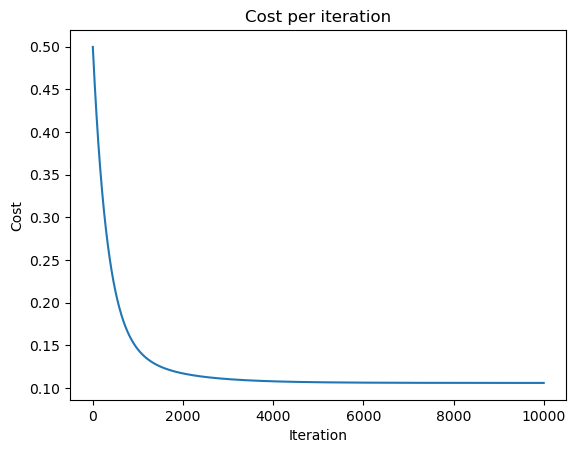

In [15]:
# plot the cost as a function of iterations
plt.plot(cost_history_cars)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

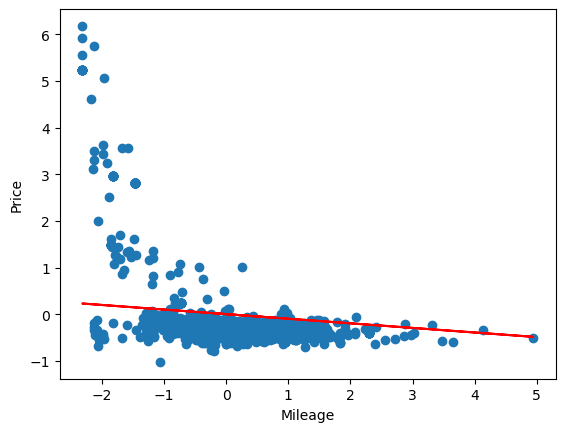

In [16]:
# plot points of X1 and Y
plt.scatter(,)
plt.xlabel('Mileage')
plt.ylabel('Price')

# make predictions and plot
predictions_cars = 
plt.plot(, , c='r')
plt.show()

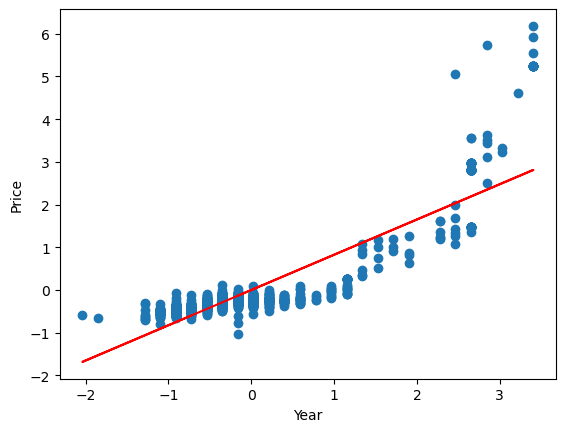

In [17]:
# plot points of X2 and Y
plt.scatter(, )
plt.xlabel('Year')
plt.ylabel('Price')

# make predictions and plot
predictions_cars = 
plt.plot(, , c='r')

plt.show()

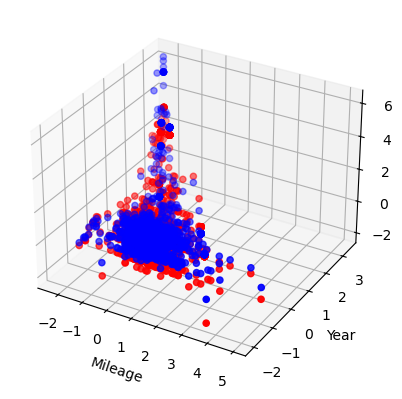

In [18]:
# plot X1, X2, Y, and predicted Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(, , , c='b')

predictions_cars = 
ax.scatter(, , , c='r')

ax.set_xlabel("Mileage")
ax.set_ylabel("Year")
ax.set_zlabel("Price")

plt.show()

In [19]:
# make predictions
cars_predictions_scratch = 

In [20]:
# evaluate model
print(mean_squared_error(, ))
print(r2_score(, ))

39560111.83368863
0.7291271631074961


In [21]:
# predict the price for the given car
mileage = 240000
year = 2000
actual_price = 11500

# normalize
mileage = 
year = 
actual_price = 

# predict
predicted_price = 

# revert back to original range and print the prediction
print()

15841.438881101605
11500.0


In [22]:
# predict the price for the given car
mileage = 415558
year = 1996
actual_price = 8800

# normalize
mileage = 
year = 
actual_price = 

# predict
predicted_price = 

# revert back to original price and print the prediction 
print()

5426.065566509864
8800.0


## 3. Linear regression using library 

In [23]:
# create data matrix of two original features
X_train_cars = np.column_stack((, ))

In [24]:
# create linear regression model instance and train it
regression_model = LinearRegression()
regression_model.fit(, )

LinearRegression()

In [25]:
# make predictions
cars_predictions_library = regression_model.predict()

In [26]:
# evaluate model
print(mean_squared_error(, ))
print(r2_score(, ))

39556044.5798613
0.730246202435938


In [27]:
# create data matrix for test cars and predict
X_test_cars = [[240000, 2000], [415558, 1996]]
print(regression_model.predict())

[15820.54127243  5453.69414862]


## 4. Linear regression using normal equation

In [28]:
# implement normal equation and apply it to normalized data
T_normaleq = 

In [29]:
print(T_normaleq)

[ 1.69204928e-14 -9.33437483e-02  8.30867464e-01]


# Logistic Regression

## 1. Data

In [30]:
# read data
exams = 

In [31]:
# get columns
X1_exams = 
X2_exams = 
Y_exams = 

In [32]:
# create copies of original for later use
X1_exams_copy = 
X2_exams_copy = 
Y_exams_copy = 

# scale data using min-max scaling
X1_exams = 
X2_exams = 

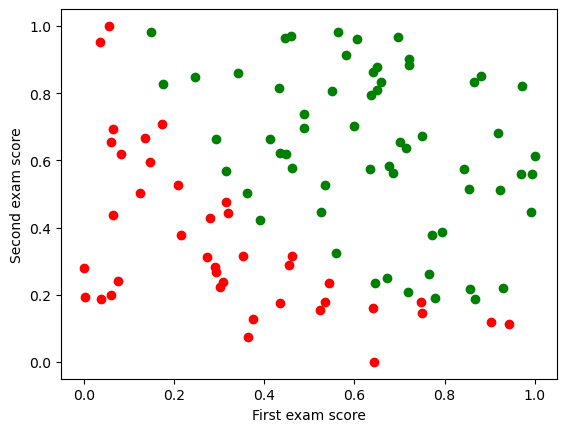

In [33]:
# plot points of X1, X2 and color-code labels
plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.scatter(, , color = 'green')
plt.scatter(, , color = 'red')

## 2. Logistic regression from scratch 

In [34]:
# implement sigmoid hypothesis function
def h_logistic(X, T):
    return 

In [35]:
# implement cost function
def J_logistic(h, Y):
    return 

In [36]:
# create data matrix with three features (add bias feature)
X0_exams = 
X_exams = 

In [37]:
# initialize parameters vector to zeros
T_exams = 

In [38]:
# set learning rate and number of iterations
alpha_exams = 0.1
iterations_exams = 10000

In [39]:
# get optimized parameter values and cost history
optimal_T_exams, cost_history_exams = gradient_descent(,
                                                       ,
                                                       ,
                                                       ,
                                                       ,
                                                       ,
                                                       )

Iteration #0
0.6931471805599453
Iteration #1000
0.3713254689168793
Iteration #2000
0.3036686574748253
Iteration #3000
0.27351991887716426
Iteration #4000
0.25631767121530763
Iteration #5000
0.2451649125948483
Iteration #6000
0.23735232829721592
Iteration #7000
0.23158889644988437
Iteration #8000
0.22717700431041687
Iteration #9000
0.22370482136675496


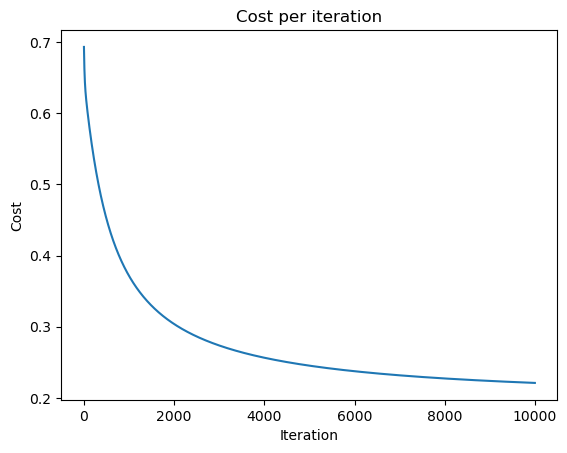

In [40]:
# plot the cost as a function of iterations
plt.plot(cost_history_exams)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

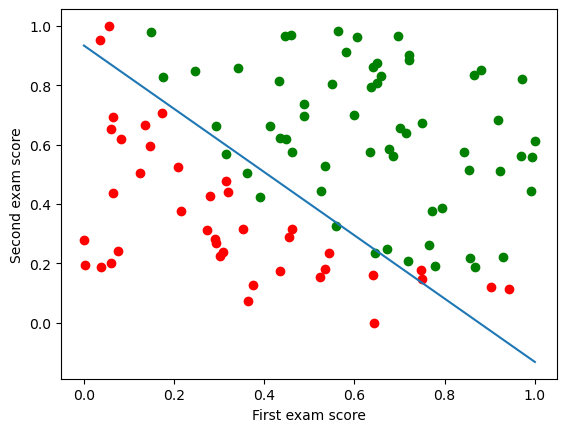

In [41]:
# plot points of X1, X2, and color-code labels
plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.scatter(, , color = 'green')
plt.scatter(, , color = 'red')

# plot decision boundary
X_values = 
Y_values = 
plt.plot(, )

In [42]:
# make predictions with threshold 0.5
exams_probabilities_scratch = 
exams_predictions_scratch = np.where(exams_probabilities_scratch>=0.5, , )

In [43]:
# evaluate model
print(accuracy_score(, ))

0.89


In [44]:
# predict whether the following student passed
exam1 = 55
exam2 = 70

# scale
exam1 = 
exam2 = 

# predict
predicted_value = 
print(predicted_value)

0.5534893902055654


In [45]:
# predict whether the following student passed
exam1 = 40
exam2 = 60

# scale
exam1 = (exam1 - X1_exams_copy.min())/(X1_exams_copy.max() - X1_exams_copy.min())
exam2 = (exam2 - X2_exams_copy.min())/(X2_exams_copy.max() - X2_exams_copy.min())

# predict
predicted_value = h_logistic([1, exam1, exam2], optimal_T_exams)
print(predicted_value)

0.04398410113953509


## 3. Logistic regression using library 

In [46]:
# create data matrix of two original features
X_train_exams = np.column_stack((, ))

In [47]:
# create logistic regression model instance and train it
model = LogisticRegression()
model.fit(, )

LogisticRegression()

In [48]:
# make predictions with library
exams_predictions_library = model.predict()

In [49]:
# evaluate model
print(accuracy_score(, ))

0.89


In [50]:
# create data matrix for test students and predict
X_test_exams = [[55, 70], [40, 60]]
print(model.predict_proba())

[[0.42967107 0.57032893]
 [0.99186143 0.00813857]]
